# Imports

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
import string
from sklearn.decomposition import PCA
from matplotlib import pyplot
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
!pip install textmining -q
from gensim.models.phrases import Phrases
import sys
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data and Dropping Columns

In [ ]:
data = "/content/drive/MyDrive/Sem-7 Books/MS4610/Project/Salonpas - Sentiment File.xlsx - Salonpas - Sentiment File.csv"
df = pd.read_csv(data) ### LOAD DATA
drop_cols = ['date', 'Before Translation', 'Before Pronoun Resolution', 
             'Review Count', 'Number of Ratings', 'Review Title', 'Root'] 
df = df.drop(drop_cols, axis=1) ### DROPPING EMPTY COLUMNS
subset = ['Review','Sentence', 'Product Rating', 'Sentiment Score','Aspect', 'Context Aspect']
dfc = df[subset] ### EXTRACTING RELEVANT COLUMNS
dfc = dfc.rename(columns={'Review': 'review', 'Sentence': 'sentence', 'Product Rating':'rating',
                          'Sentiment Score': 'sentiment', 'Aspect':'aspect', 'Context Aspect':'context_aspect'})
dfc = dfc.drop_duplicates() ### RENAMING AND DROPPING COLUMNS
dfc

In [ ]:
### CLEANING 
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
ps = nltk.stem.PorterStemmer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def stem_text(text):
    return [ps.stem(w) for w in w_tokenizer.tokenize(text)]

def clean(dfc, column):
  dfc[column] = dfc[column].apply(lambda row: deEmojify(row))
  dfc[column] = dfc[column].str.lower()
  dfc[column] = dfc[column].apply(lemmatize_text)
  dfc[column] = dfc[column].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
  dfc[column] = dfc[column].str.replace('[{}]'.format(string.punctuation), '')
  dfc[column] = dfc[column].str.replace(r'[.]{2,}', ' ', regex=True).str.replace('’', ' ').str.replace('\d+', ' ', regex=True).str.replace(r"“", " ").str.replace(r"\\", ' ')
  dfc[column] = dfc[column].str.replace(r'-{1,}', ' ').str.replace(r"!+", " ", regex=True).str.replace(r"/+", " ").str.replace(r",+",' ').str.replace(r".", ' .').str.replace('@', ' ')
  dfc[column] = dfc[column].str.replace(r'>+', ' ').str.replace('…', ' ').str.replace('—', ' ').str.replace("”", " ")
  dfc[column] = dfc[column].str.replace(r'\s+', ' ')
  dfc[column] = dfc[column].str.lstrip()
  dfc[column] = dfc[column].str.rstrip()

clean(dfc, 'review') ### CLEANING REVEIW
clean(dfc, 'sentence') ### CLEANING SENTENCE
dfc

,review,sentence,rating,sentiment,aspect,context_aspect,concat,concat_bef
0,damaging heart kidneys help arthritis pain sho...,help arthritis pain short period time making h...,4.5,0.8,pain and spasm types,arthritis pain,Very damaging to heart and kidneys. It helps w...,"[Very damaging to heart and kidneys, It helps..."
1,damaging heart kidneys help arthritis pain sho...,help arthritis pain short period time making h...,4.5,0.8,size,short period,Very damaging to heart and kidneys. It helps w...,"[Very damaging to heart and kidneys, It helps..."
2,work quite well neck shoulder pain due arthrit...,work quite well neck shoulder pain due arthritis,4.5,0.9,pain and spasm types,arthritis pain,works quite well for neck and shoulder pain du...,[works quite well for neck and shoulder pain d...
3,work quite well neck shoulder pain due arthrit...,work quite well neck shoulder pain due arthritis,4.5,0.9,pain and spasm types,shoulder pain,works quite well for neck and shoulder pain du...,[works quite well for neck and shoulder pain d...
4,work quite well neck shoulder pain due arthrit...,smell strong many drugstore brand,4.5,-0.4,smell,smell strong,works quite well for neck and shoulder pain du...,[works quite well for neck and shoulder pain d...
...,...,...,...,...,...,...,...,...
71668,product work don t get wrong don t get much pr...,feel priciest work better leading brands,4.4,0.9,effectiveness,better worked,So this product works don’t get me wrong. But ...,"[So this product works don’t get me wrong, Bu..."
71669,product work don t get wrong don t get much pr...,product work don t get wrong,4.4,0.3,effectiveness,works product,So this product works don’t get me wrong. But ...,"[So this product works don’t get me wrong, Bu..."
71670,used today got it used roll applicator back ne...,scent overwhelming worse bengay,4.5,-0.8,smell,scent overwhelming,"Used today when I got it, used the roll on app...","[Used today when I got it, used the roll on ap..."
71671,used today got it used roll applicator back ne...,work well,4.5,0.9,effectiveness,well works,"Used today when I got it, used the roll on app...","[Used today when I got it, used the roll on ap..."


In [ ]:
lines_rev = np.unique(dfc.review.values)
tok_rev = [word for line in lines_rev for word in line.split()] ### LIST OF TOKENS IN REVIEW
lines_sen = np.unique(dfc.sentence.values)
tok_sen = [word for line in lines_sen for word in line.split()] ### LIST OF TOKENS IN SENTENCE

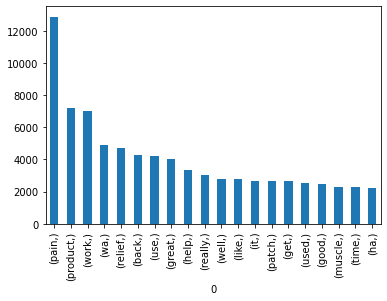

In [ ]:
freq_rev = pd.DataFrame(tok_rev).value_counts()
freq_sen = pd.DataFrame(tok_sen).value_counts()
(freq_rev[:20]).plot.bar() ### PLOT OF MOST FREQUENT TOKENS

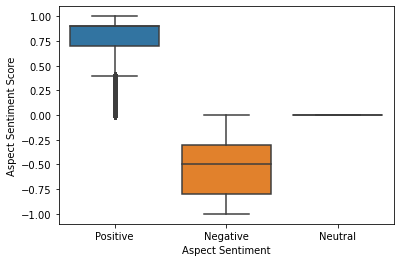

In [ ]:
### ASPECT SENTIMENT SCORE VS ASPECT SENTIMENT
sns.boxplot(x='Aspect Sentiment', y='Aspect Sentiment Score', data=df)

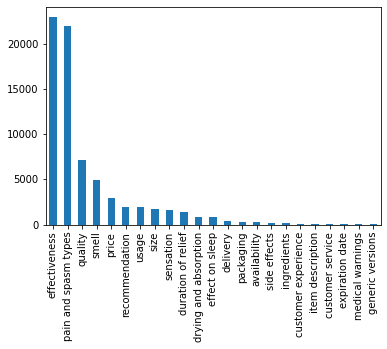

In [ ]:
### COUNT OF REVIEWS IN EACH CLUSTER
df['Aspect'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


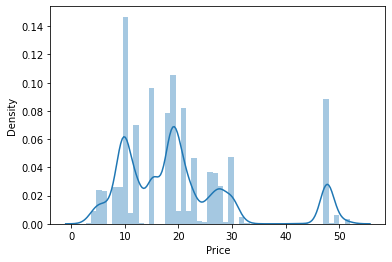

In [ ]:
### DISTRIBUTION OF PRICE OF PRODUCTS
df['Price'] = df['Price'].str.lstrip(" $ ").astype('float')
sns.distplot(df['Price'])

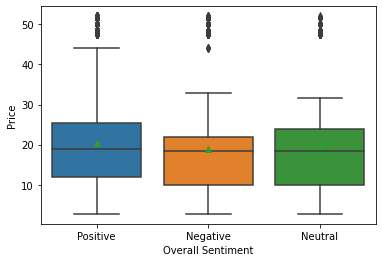

In [ ]:
### OVERALL SENTIMENT VS PRICE
sns.boxplot(x='Overall Sentiment', y='Price', data=df, showmeans=True)

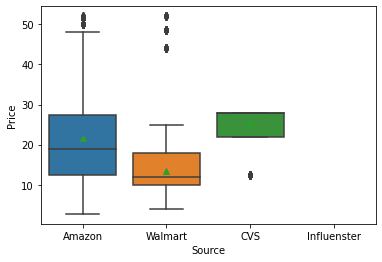

In [ ]:
### PRICE VS SOURCE
sns.boxplot(x='Source', y='Price', data=df, showmeans=True)

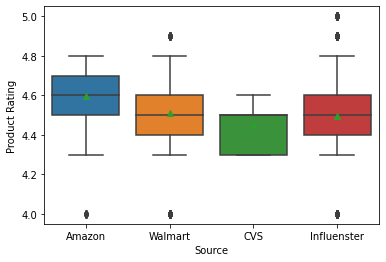

In [ ]:
### PRODUCT RATING VS SOURCE
sns.boxplot(x='Source', y='Product Rating', data=df, showmeans=True)

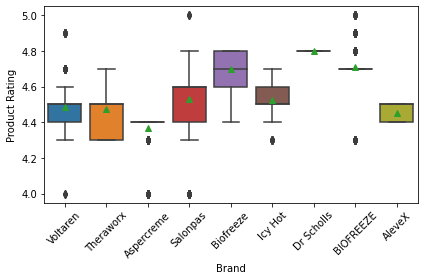

In [ ]:
### PRODUCT RATING VS BRAND
ax = sns.boxplot(x='Brand', y='Product Rating', data=df, showmeans=True)
plt.xticks(rotation=45)
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

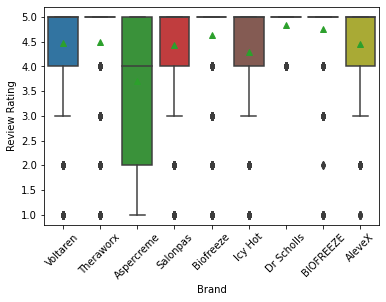

In [ ]:
### REVIEW RATING VS BRAND
sns.boxplot(x='Brand', y='Review Rating', data=df, showmeans=True)
plt.xticks(rotation=45)

In [ ]:
### TERM DOCUMENT MATRIX WITH TF ANF TF-IDF VECTORIZER
n_features = 4000
x = np.unique(dfc.review.values)
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=5, max_features=n_features, stop_words='english') #, ngram_range=(1, 2))
tf = tf_vectorizer.fit_transform(x)

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, max_features=n_features, stop_words='english') #, ngram_range=(1, 2))
tfidf = tfidf_vectorizer.fit_transform(x)

dict(zip(tfidf_vectorizer.get_feature_names(), tfidf.toarray()[0])) ## tf-idf scores for the first document

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'abdomen': 0.0,
 'ability': 0.0,
 'able': 0.19506809942826187,
 'absolute': 0.0,
 'absolutely': 0.0,
 'absorb': 0.0,
 'absorbed': 0.0,
 'absorbing': 0.0,
 'absorbs': 0.0,
 'absorption': 0.0,
 'acceptable': 0.0,
 'access': 0.0,
 'accident': 0.0,
 'accidentally': 0.0,
 'accompanies': 0.0,
 'according': 0.0,
 'account': 0.0,
 'accurate': 0.0,
 'ace': 0.0,
 'acetaminophen': 0.0,
 'ache': 0.0,
 'aches': 0.0,
 'achespain': 0.0,
 'achey': 0.0,
 'achilles': 0.0,
 'aching': 0.0,
 'achy': 0.0,
 'act': 0.0,
 'acting': 0.0,
 'action': 0.0,
 'active': 0.0,
 'activities': 0.0,
 'activity': 0.0,
 'actual': 0.0,
 'actually': 0.0,
 'acupuncture': 0.0,
 'acute': 0.0,
 'ad': 0.0,
 'add': 0.0,
 'added': 0.0,
 'addicted': 0.0,
 'addictive': 0.0,
 'adding': 0.0,
 'addition': 0.0,
 'additional': 0.0,
 'additionally': 0.0,
 'address': 0.0,
 'adequate': 0.0,
 'adhere': 0.0,
 'adhered': 0.0,
 'adheres': 0.0,
 'adhesion': 0.0,
 'adhesive': 0.0,
 'admit': 0.0,
 'ads': 0.0,
 'adult': 0.0,
 'advanced': 0.0,
 'adva

In [ ]:
### WORD2VEC
from gensim.models import Word2Vec
corpus = list(np.unique(dfc.review.values)) + list(np.unique(dfc.sentence.values))
model = Word2Vec([s.split() for s in corpus])
words = list(model.wv.vocab)
print(words)

['able', 'get', 'mail', 'great', 'first', 'wa', 'drug', 'store', 'wasnt', 'told', 'biofreeze', 'available', 'chiropractors', 'offices', 'glad', 'way', 'work', 'much', 'better', 'arthritic', 'rubs', 'absolute', 'best', 'come', 'pain', 'relief', 'soreness', 'soothes', 'right', 'away', 'feel', 'amazing', 'back', 'knees', 'already', 'gotten', 'coworker', 'convinced', 'must', 'tendonitis', 'ive', 'ever', 'had', 'well', 'cramp', 'lower', 'staple', 'house', 'thing', 'used', 'aching', 'muscle', 'joints', 'hot', 'burn', 'like', 'icy', 'does', 'warm', 'cooling', 'sensation', 'comforting', 'st', 'time', 'felt', 'til', 'give', 'omg', 'cant', 'take', 'anymore', 'love', 'it', 'use', 'swear', 'found', 'relieve', 'dialysis', 'cramps', 'home', 'remedy', 'crap', 'waste', 'money', 'brand', 'this', 'fall', 'even', 'stuck', 'good', 'favorite', 'product', 'rollerball', 'game', 'changer', 'mess', 'hand', 'wasted', 'washed', 'sink', 'worlds', 'sore', 'muscles', 'miracle', 'cannot', 'believe', 'really', 'suffe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


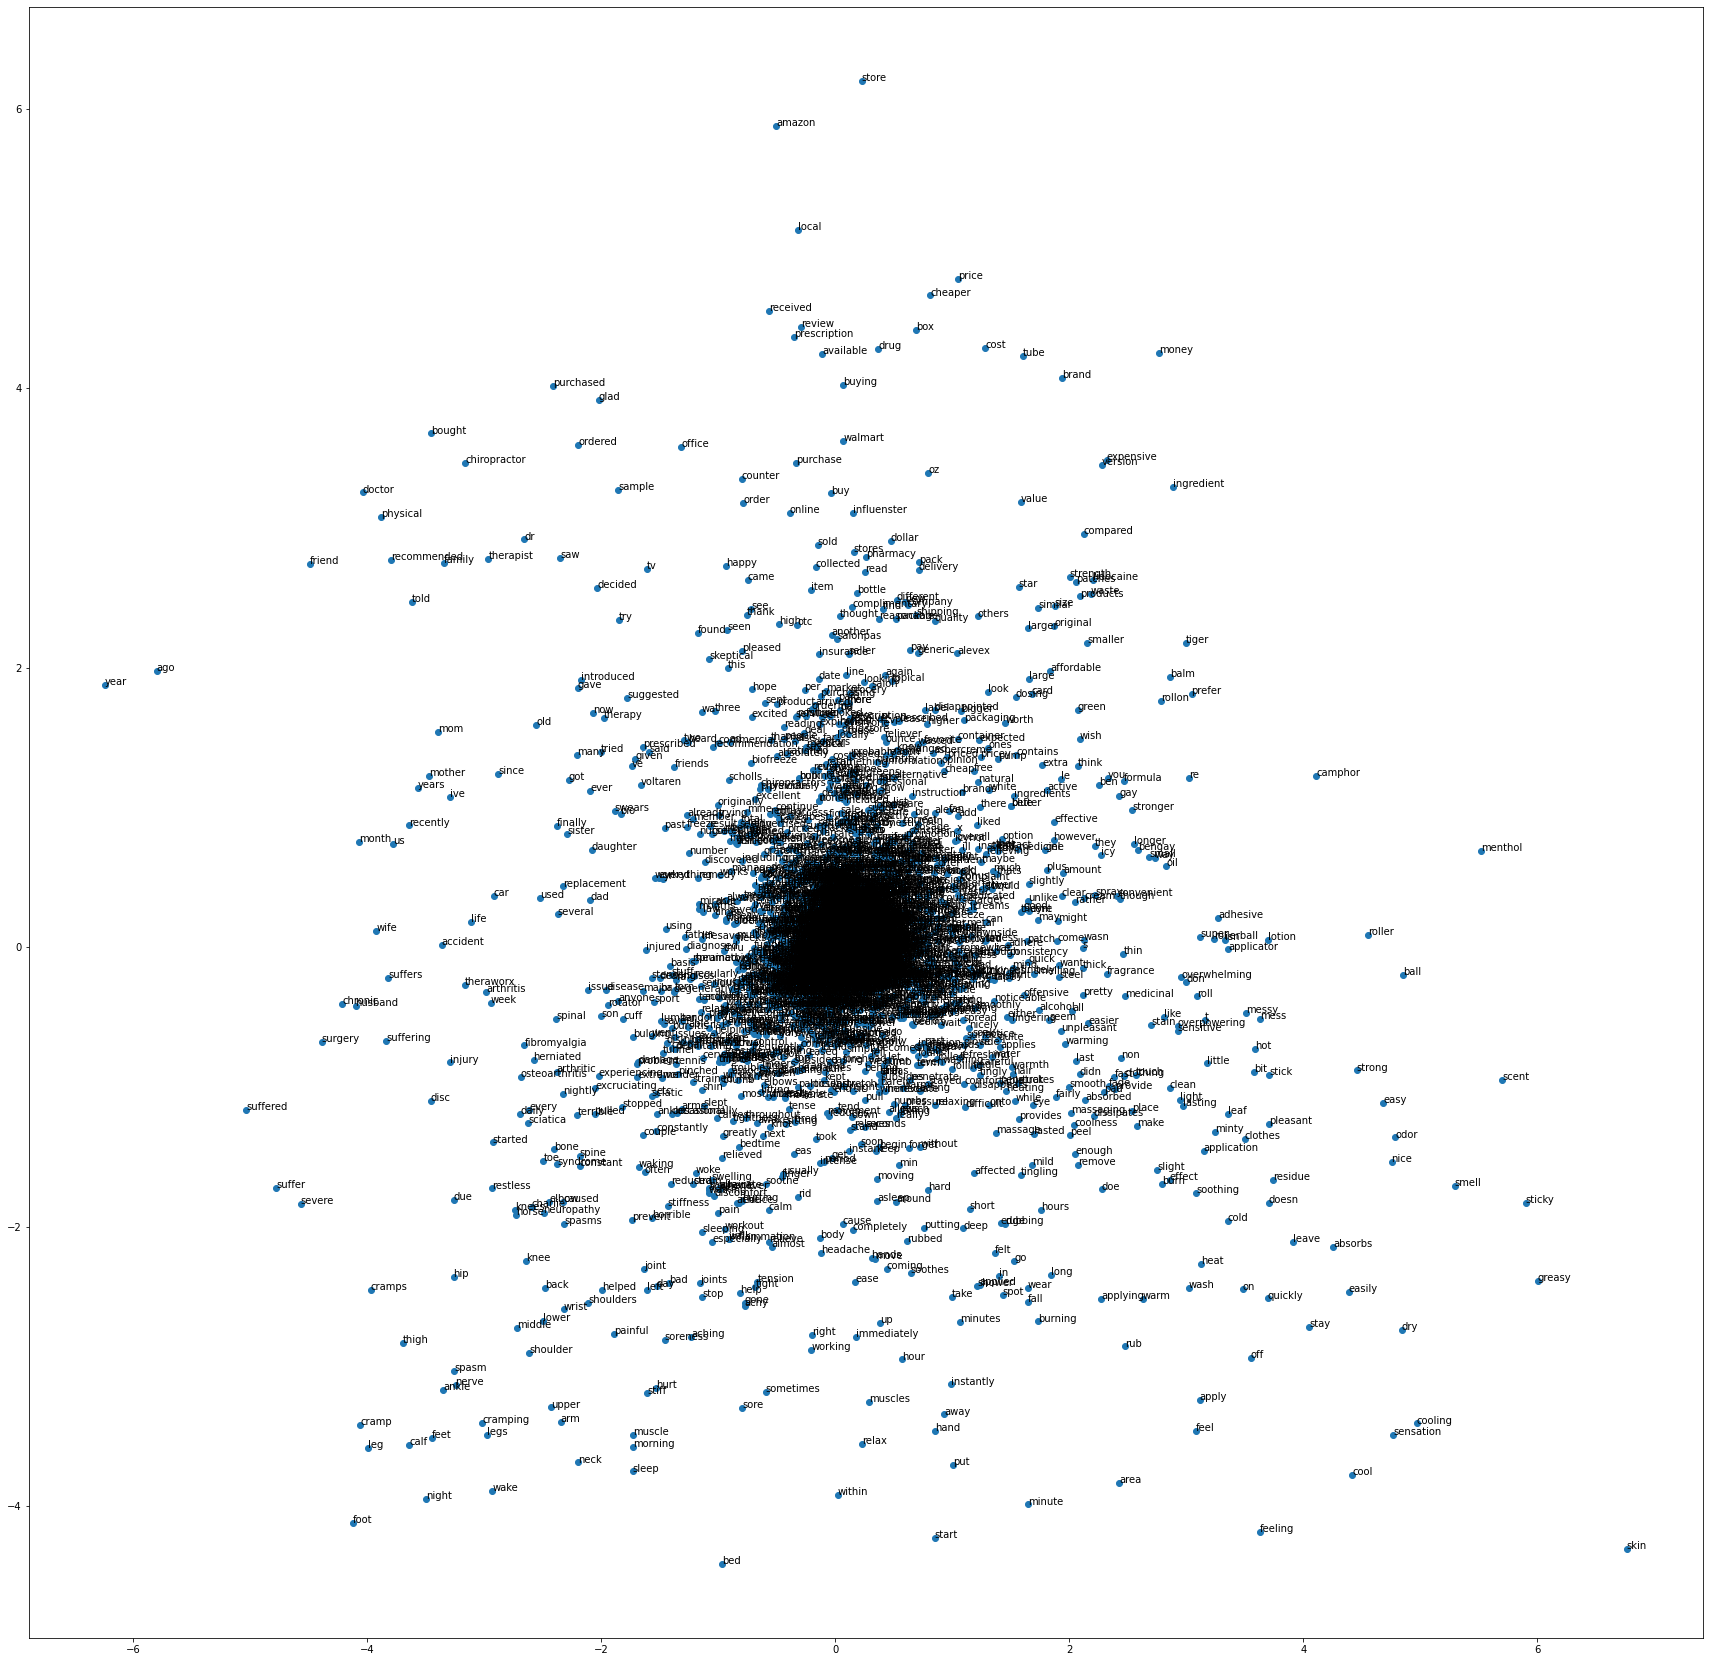

In [ ]:
# define training data
# train model
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(30,30))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
## phrase extraction for each group
def get_phrases(df, min_count=1):
  sentence_stream = [sent.split() for sent in np.unique(df['sentence'].values)]
  bigram = Phrases(sentence_stream, min_count=min_count)
  trigram = Phrases(bigram[sentence_stream], min_count=min_count)
  bigram_list = []
  trigram_list = []
  sent = []
  for i in sentence_stream:
    sent+=i
  bigrams_ = [b for b in bigram[sent] if b.count('_') == 1]
  trigrams_ = [t for t in trigram[bigram[sent]] if t.count('_') == 2]
  
  return set(bigrams_), set(trigrams_)

g = dfc.groupby('aspect')
print(g.groups.keys())
a = g.get_group('size')
b,t=get_phrases(a, min_count=5)
len(a),len(b),b

dict_keys(['availability', 'customer experience', 'customer service', 'delivery', 'drying and absorption', 'duration of relief', 'effect on sleep', 'effectiveness', 'expiration date', 'generic versions', 'ingredients', 'item description', 'medical warnings', 'packaging', 'pain and spasm types', 'price', 'quality', 'recommendation', 'sensation', 'side effects', 'size', 'smell', 'usage'])


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


(1742,
 32,
 {'ache_pains',
  'back_neck',
  'big_enough',
  'doesn_t',
  'don_t',
  'go_away',
  'go_long',
  'great_value',
  'i_m',
  'icy_hot',
  'it_s',
  'last_long',
  'leg_cramp',
  'little_bit',
  'little_pricey',
  'long_time',
  'long_way',
  'lot_le',
  'lower_back',
  'minor_ache',
  'pain_relief',
  'period_time',
  'pricey_worth',
  'quite_bit',
  'short_period',
  'short_term',
  'small_amount',
  'stick_well',
  'term_relief',
  'they_re',
  'tiny_bit',
  'work_well'})

In [ ]:
## review2vec and phrase2vec
def get_vector_for_review(num):
  tfidf_dict = dict(zip(tfidf_vectorizer.get_feature_names(), tfidf.toarray()[num])) ## tf-idf scores for the review
  sum = 0
  for word in x[num].split():
    try:
      sum+=model[word]*tfidf_dict[word]
    except:
      pass
  return sum

In [ ]:
## reviews with TF-IDF 4000 dim vectors
# rev_tdm = dfc[['review', 'rating', 'sentiment']].drop_duplicates(subset=['review'], keep='first').reset_index().join(pd.DataFrame(tfidf.toarray()))
from tqdm.notebook import tqdm
## reviews with word2vec 100 dim vectors
# mat = get_vector_for_review(0)
for i in tqdm(range(18168, len(x))):
  vec = get_vector_for_review(i)
  if isinstance(vec, int):
    vec = np.zeros(100)
  mat = np.vstack((mat, vec))


  0%|          | 0/1987 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


# HDBSCAN WITH WORD2VEC

In [ ]:
!pip install hdbscan
import hdbscan
clusterer = hdbscan.HDBSCAN(min_samples=1)
clusterer.fit(mat)
clusterer.labels_
clusterer.labels_.max()

In [ ]:
clusterer.probabilities_